<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0922/blob/main/inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model = InceptionV3(include_top=False, input_shape=(224, 224, 3))
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="inception.png", show_shapes=True)

In [8]:
# 右邊1: 1 x 1卷積(通道再組合)
w = model.get_layer("conv2d_5").get_weights()
# (1, 1, 192, 64): 64過濾器, 192前一層通道數 (1, 1)卷積窗大小
w[0].shape

(1, 1, 192, 64)

In [9]:
# 右邊2: Average(模糊化) -> 1 x 1卷積(通道再組合)
w = model.get_layer("conv2d_11").get_weights()
print(w[0].shape)

(1, 1, 192, 32)


In [11]:
# 右邊3: 1 x 1卷積(48)[減少一下計算量] -> 5 x 5 卷積
w = model.get_layer("conv2d_6").get_weights()
print(w[0].shape)
# kernel: 5 x 5
w = model.get_layer("conv2d_7").get_weights()
print(w[0].shape)

(1, 1, 192, 48)
(5, 5, 48, 64)


In [12]:
# 右邊4: 1 x 1卷積 -> 3 x 3卷積 -> 3 x 3卷積
w = model.get_layer("conv2d_8").get_weights()
print(w[0].shape)
w = model.get_layer("conv2d_9").get_weights()
print(w[0].shape)
w = model.get_layer("conv2d_10").get_weights()
print(w[0].shape)

(1, 1, 192, 64)
(3, 3, 64, 96)
(3, 3, 96, 96)


In [24]:
from tensorflow.keras.models import Model
# Tensor(多維向量) -> layer(Function) -> Tensor(多維向量)
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Concatenate
i = Input(shape=(25, 25, 192))
# 1
x1 = Conv2D(64, 1, padding="same", activation="relu")(i)
# 2
x2 = AveragePooling2D(strides=1, padding="same")(i)
x2 = Conv2D(32, 1, padding="same", activation="relu")(x2)
# 3
x3 = Conv2D(48, 1, padding="same", activation="relu")(i)
x3 = Conv2D(64, 5, padding="same", activation="relu")(x3)
# 4
x4 = Conv2D(64, 1, padding="same", activation="relu")(i)
x4 = Conv2D(96, 3, padding="same", activation="relu")(x4)
x4 = Conv2D(96, 3, padding="same", activation="relu")(x4)
# combine
out = Concatenate(axis=-1)([x1, x2, x3, x4])
model = Model(inputs=[i], outputs=[out])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 25, 25, 192) 0                                            
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 25, 25, 64)   12352       input_12[0][0]                   
__________________________________________________________________________________________________
average_pooling2d_15 (AveragePo (None, 25, 25, 192)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_114 (Conv2D)             (None, 25, 25, 48)   9264        input_12[0][0]                   
______________________________________________________________________________________________

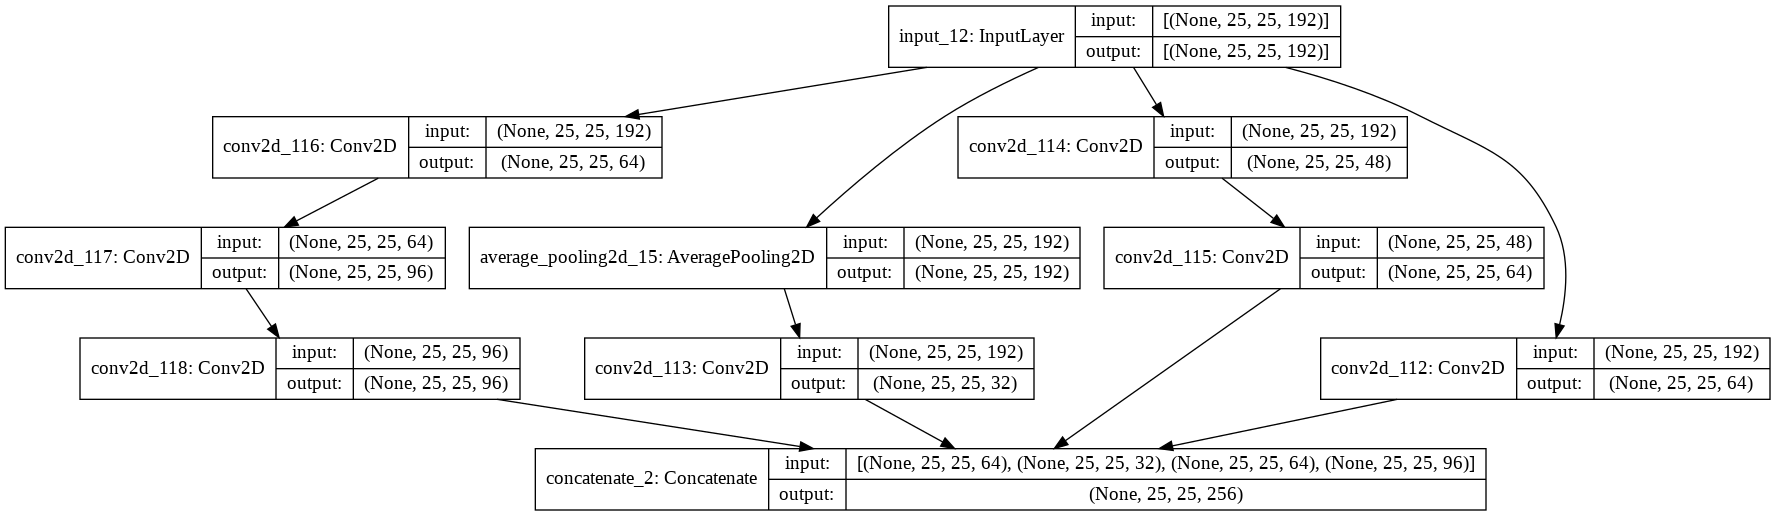

In [25]:
plot_model(model, to_file="inception.png", show_shapes=True)